In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re

from google.colab import drive
drive.mount('/content/drive/')

data_path = "" # path to the data

Mounted at /content/drive/


## General Overview

In [2]:
df = pd.read_csv(os.path.join(data_path, "Hotel_Reviews.csv"))
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
print(df.shape)

(515738, 17)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
df['Hotel_Address'][df['lat'].isna()].unique()

array(['20 Rue De La Ga t 14th arr 75014 Paris France',
       '23 Rue Damr mont 18th arr 75018 Paris France',
       '4 rue de la P pini re 8th arr 75008 Paris France',
       'Bail n 4 6 Eixample 08010 Barcelona Spain',
       'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
       'Hasenauerstra e 12 19 D bling 1190 Vienna Austria',
       'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
       'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria',
       'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
       'Paragonstra e 1 11 Simmering 1110 Vienna Austria',
       'Pau Clar s 122 Eixample 08009 Barcelona Spain',
       'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
       'Sep lveda 180 Eixample 08011 Barcelona Spain',
       'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
       'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
       'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
       'W hringer Stra e 33 35 09 Als

**Findings**:
1. The dataset has more than 500K rows with 17 columns.
2. The only columns which have missing values are the latitude and longitude column. They come from hotels located in Paris, Vienna and Barcelona

## Hotel Location

In [12]:
last_two_address = df['Hotel_Address'].apply(lambda x: " ".join(x.split()[-2:]))
print(set(last_two_address))

{'Vienna Austria', 'Paris France', 'United Kingdom', 'Barcelona Spain', 'Amsterdam Netherlands', 'Milan Italy'}


In [14]:
countries = ['Austria', 'France', 'United Kingdom', 'Spain', 'Netherlands', 'Italy']
def extract_country(address):
    for country in countries:
        if country in address:
            return country
    return None

# Create a new column with the country name
df['Country'] = df['Hotel_Address'].apply(extract_country)

In [16]:
temp = df.groupby('Country')['Hotel_Address'].count().reset_index()
temp.columns = ['Country', 'Count']
temp

,Country,Count
0,Austria,38939
1,France,59928
2,Italy,37207
3,Netherlands,57214
4,Spain,60149
5,United Kingdom,262301


In [17]:
temp['Percentage'] = temp['Count'] / temp['Count'].sum() * 100
temp

,Country,Count,Percentage
0,Austria,38939,7.550151
1,France,59928,11.619853
2,Italy,37207,7.214322
3,Netherlands,57214,11.093617
4,Spain,60149,11.662705
5,United Kingdom,262301,50.859351


<ipython-input-23-0d5b54f67814>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Count', data=temp, palette="viridis")


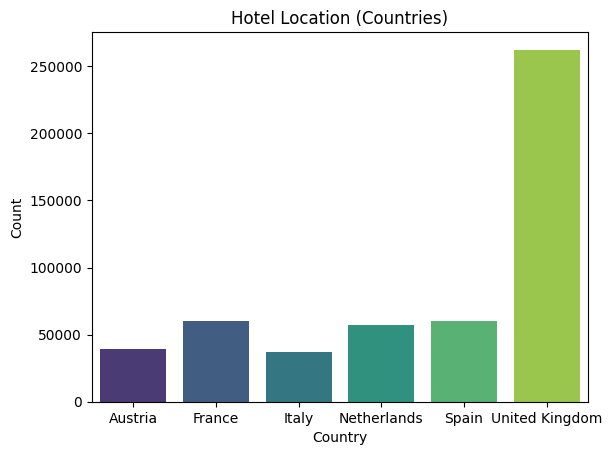

In [23]:
sns.barplot(x='Country', y='Count', data=temp, palette="viridis")
plt.title("Hotel Location (Countries)")
plt.show()

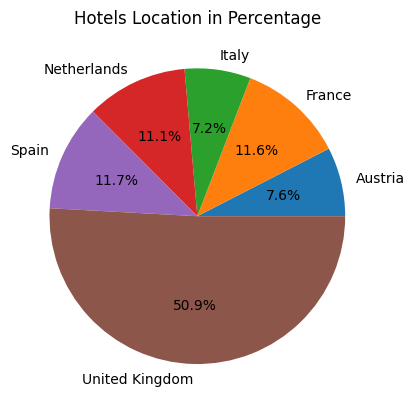

In [29]:
plt.pie(temp['Percentage'], labels=temp['Country'], autopct="%1.1f%%")
plt.title("Hotels Location in Percentage")
plt.show()

## Reviewers

In [ ]:
df['Reviewer_Nationality'].unique()

In [41]:
temp = df.groupby('Reviewer_Nationality')['Hotel_Name'].count().reset_index()
temp.columns = ['Reviewer_Nationality', 'Count']
temp.sort_values('Count', inplace=True)
temp

,Reviewer_Nationality,Count
194,Svalbard Jan Mayen,1
87,Guinea,1
39,Cape Verde,1
220,Vatican City,1
150,Northern Mariana Islands,1
...,...,...
213,United Arab Emirates,10235
98,Ireland,14827
14,Australia,21686
216,United States of America,35437


In [42]:
temp['Percentage'] = temp['Count'] / temp['Count'].sum() * 100

In [43]:
temp['Count'].median()

61.0

In [44]:
temp

,Reviewer_Nationality,Count,Percentage
194,Svalbard Jan Mayen,1,0.000194
87,Guinea,1,0.000194
39,Cape Verde,1,0.000194
220,Vatican City,1,0.000194
150,Northern Mariana Islands,1,0.000194
...,...,...,...
213,United Arab Emirates,10235,1.984535
98,Ireland,14827,2.874909
14,Australia,21686,4.204848
216,United States of America,35437,6.871124


<ipython-input-46-86d29da8d05b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Reviewer_Nationality', data=last10temp, palette='rocket')


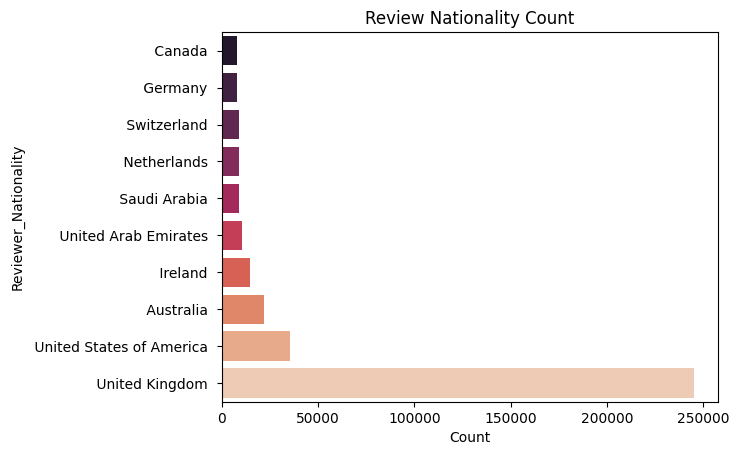

In [46]:
# take only top10
last10temp = temp.tail(10)

sns.barplot(x='Count', y='Reviewer_Nationality', data=last10temp, palette='rocket')
plt.title("Review Nationality Count")
plt.show()

## Review Score

In [52]:
df['Average_Score'].mean()

8.39748690226433

## Conclusion

Most hotels and reviewers are coming from United Kingdom. To avoid data bias, only the data from United Kingdom are considered.